## 0. Introduction

The purpose of this notebook is to explore Autoregressive Moving Average $(\text{ARMA})$ models with reference to chapters 3 and 4 from *Applied Time Series Analysis and Forecasting with Python* (Huang \& Petukhina, 2022).

## 1. Differencing and Stationarity

The backshift (or lag) operator is like a matrix in mathematics but operates on a time series $\{X_t\}$. Using $B$ for backshift, we define the backshift operator by 

$$ B \, X_t = X_{t-1}. $$

That is, $B$ has the effect of shifting the data back one step when operating on $\{X_t\}$. Generally, we define

$$ B^n \, X_t = B^{n-1} (B \, X_t) = X_{t-n}, $$

for any integer $n \geq 1$ and $B^0 \, X_t = X_t$. 

Using the backshift operator $B$, the random walk can be written as $(1 − B) \, X_t = W_t$ where $W_t \sim \text{WN}(0, \sigma^2)$.

We can make a nonstationary time series stationary by computing the differences between consecutive time series values. This is known as *differencing*. 

Using the backshift operate $B$, the differencing of order $d$ (or $d\text{th}$) order differencing is defined as

$$ \nabla^1 X_t = \nabla X_t = (1 - B) \, X_t = X_t - X_{t-1}, \quad \nabla^d X_t = (1 - B)^d \, X_t. \tag{1.1} $$

It is also called the difference operator of order $d$. The differencing of lag $k$ is defined as

$$ \nabla_1 X_t = \nabla X_t = (1 - B) \, X_t = X_t - X_{t-1}, \quad \nabla_k X_t = (1 - B^k) \, X_t = X_t - X_{t-k}. \tag{1.2} $$

If the lag $k$ in (1.2) is the number of seasons (or the period of a time series), the lag $k$ differencing is known as the seasonal differencing. 

We do differencing in order to make a nonstationary time series stationary. If a time series possesses trend but no seasonality, in order to make it stationary, just use the $d\text{th}$ order differencing. If a time series has seasonality, we should firstly do the seasonal differencing and then consider whether the $d\text{th}$ order differencing is needed. It is because the seasonally differenced series will sometimes be stationary. $\nabla^d \neq \nabla_d$ except for $d=1$.

<center><img src="../figures/fo_diff.png"/></center>

## 2. Autoregressive Moving Average Models

### 2.1 AR Models

The following equation is called the autoregressive model of order $p$ and denoted by $\text{AR}(p)$:

$$ X_t = \varphi_0 + \varphi_1 X_{t-1} + \varphi_2 X_{t-2} + \dots + \varphi_p X_{t-p} + \varepsilon_t, \tag{2.1.1} $$

where $\{\varepsilon_t\} \sim \text{WN}(0, \sigma_{\epsilon}^2), \mathbb{E}(X_s \varepsilon_t) = 0$ if $s < t$ and $\varphi_0, \varphi_1, \cdots , \varphi_p$ are real-values parameters (coefficients) with $\varphi_p \neq 0$. If a time series $\{X_t\}$ is stationary and satisfies such an equation as (2.1.1), then we call it an $\text{AR}(p)$ process. 

> For simplicity, we often assume that the intercept (constant term) $\varphi_0 = 0$; otherwise, we can consider $\{X_t − \mu\}$ where $\mu = \varphi_0 / (1 - \varphi_1 - \cdots - \varphi_p)$. 

> We distinguish the concept of $\text{AR}$ models from the concept of $\text{AR}$ processes. $\text{AR}$ models may or may not be stationary and $\text{AR}$ processes must be stationary. 

> $\mathbb{E} (X_s \varepsilon_t) = 0 (s < t)$ means that $X_s$ in the past has nothing to do with $\varepsilon_t$ at the current time $t$. 

> Sometimes $\varepsilon_t$ in equation (2.1.1) is known as the innovation term or shock term.

> The $\text{AR}(p)$ model is in the same form as the multiple linear regression model. However, it explains current itself with its own past.

In addition, using the backshift operator $B$, the $\text{AR}(p)$ model can be rewritten as

$$ \varphi (B) X_t = \varepsilon_t, $$

where $\varphi(z) = 1 - \varphi_1 z - \cdots - \varphi_p z^p$ is called the (corresponding) AR polynomial.

Given an $\text{AR}(2)$ model as follows

$$ X_t = 0.8 X_{t-1} - 0.3 X_{t-2} + \varepsilon_t, $$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 200 from the $\text{AR}(2)$ model, and then graph the time series.

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

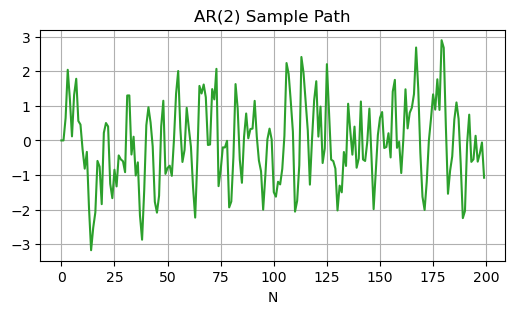

In [2]:
# Simulate a sample path from the AR(2) model given above
N = 200
X = np.zeros(N)
phi_1, phi_2 = 0.8, -0.3
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(2, N):
    X[t] = phi_1 * X[t-1] + phi_2 * X[t-2] + epsilon[t]
    
# Plot the sample path
plt.figure(figsize=(6,3))
plt.plot(X, color='C2')
plt.title('AR(2) Sample Path')
plt.xlabel('N')
plt.grid(True)
plt.show()

### 2.2 MA Models

The following equation is called the moving average model of order $q$ and denoted by $\text{MA}(q)$:

$$ X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}, \tag{2.2.1} $$

where $\{\varepsilon_t\} \sim \text{WN} (0, \sigma_\epsilon^2)$, that is, $\{\varepsilon_t\}$ is a white noise series and $\mu, \theta_1, \cdots , \theta_q$ are real-valued parameters (coefficients) with $\theta_q \neq 0$. If a time series $\{X_t\}$ is stationary and satisfies such an equation as (2.2.1), then we call it an $\text{MA}(q)$ process. 

> For simplicity, we often assume that the intercept (constant term) $\mu = 0$; otherwise, we can consider $\{X_t − \mu\}$. Note: $\mathbb{E}(X_t) = \mu. $

> We distinguish the concept of $\text{MA}$ models from the concept of $\text{MA}$ processes.

> Like the definition of $\text{AR}$ models, sometimes $\varepsilon_t$ in equation (2.2.1) is called the innovation or shock term.

> The series $\{X_t\}$ generated by equation (2.2.1) or the $\text{MA}(q)$ model is obviously always stationary.

Additionally, using the backshift operator $B$, the $\text{MA}(q)$ model can be rewritten as

$$ X_t = \theta (B) \varepsilon_t, $$

where $\theta(z) = 1 + \theta_1 z + \cdots + \theta_q z^q$ is the $\text{MA}$ polynomial.


Given an $\text{MA}(2)$ model as follows

$$ X_t = \varepsilon_t + 0.6 \varepsilon_{t-1} - 0.3 \varepsilon_{t-2}, $$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 200 from the $\text{MA}(2)$ model, and then graph the time series.

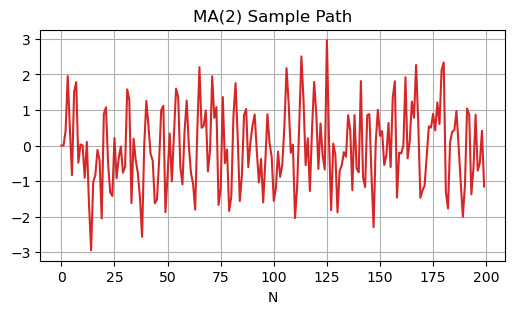

In [3]:
# Simulate a sample path from the MA(2) model given above
N = 200
X = np.zeros(N)
theta_1, theta_2 = 0.6, -0.3
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(2, N):
    X[t] = epsilon[t] + theta_1 * epsilon[t-1] + theta_2 * epsilon[t-2]
    
# Plot the sample path
plt.figure(figsize=(6,3))
plt.plot(X, color='C3')
plt.title('MA(2) Sample Path')
plt.xlabel('N')
plt.grid(True)
plt.show()

### 2.3 ARMA Models

The following equation is called the autoregressive moving average model of order $(p, q)$ and denoted by $\text{ARMA}(p, q)$:

$$ X_t = \varphi_0 + \varphi_1 X_{t-1} + \cdots + \varphi_p X_{t-p} + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q} + \varepsilon_t, \tag{2.3.1} $$

where $\{\varepsilon_t\} \sim \text{WN}(0, \sigma^{2}_\epsilon)$, $\mathbb{E}(X_s \varepsilon_t) = 0$ if $s < t$, and $\{\varphi_k\}$ and $\{\theta_k\}$ are real-valued parameters (coefficients) with $\varphi_p \neq 0$ and $\theta_q \neq 0$. If a time series $\{X_t\}$ is stationary and satisfies such an equation as (2.3.1), then we call it an $\text{ARMA}(p, q)$ process.

Alternatively, we can re-write equation (2.3.1) using sigma notation:

$$ X_t = \varphi_0 + \sum_{i=1}^{p} \varphi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t,  $$

We often assume the intercept (constant term) $\varphi_0 = 0$. Using the backshift operator $B$, the $\text{ARMA}(p, q)$ model can be rewritten as

$$ \varphi (B) X_t = \theta (B) \varepsilon_t, $$

where $\varphi(z) = 1 - \varphi_1 z - \cdots - \varphi_p z^p$ is the $\text{AR}$ polynomial and $\theta(z) = 1 + \theta_1 z + \cdots + \theta_q z^q$ is the $\text{MA}$ polynomial. We always assume that $\varphi(z)$ and $\theta(z)$ have no common factors. Besides, $\varphi(B) X_t = \varepsilon_t$ and $X_t = \theta(B) \varepsilon_t$ are, respectively, called the $\text{AR}$ part and $\text{MA}$ part of the $\text{ARMA(p, q)}$ model.

Given an $\text{ARMA}(2, 2)$ model as follows

$$ X_t = 0.8 X_{t-1} - 0.6 X_{t-2} + 0.7 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2} + \varepsilon_t, $$

where $\varepsilon_t \sim \text{iidN}(0, 1)$, simulate a sample of size (length) 200 from the $\text{ARMA}(2, 2)$ model, and then graph the time series.

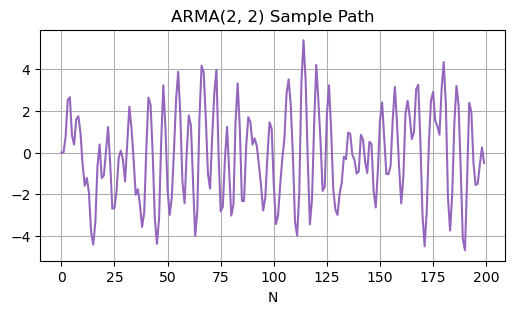

In [4]:
# Simulate a sample path from the ARMA(2, 2) model given above
N = 200
X = np.zeros(N)
phi_1, phi_2 = 0.8, -0.6
theta_1, theta_2 = 0.7, 0.4
epsilon = ss.norm.rvs(loc=0, scale=1, size=N, random_state=42)
for t in range(2, N):
    X[t] = phi_1 * X[t-1] + phi_2 * X[t-2] + theta_1 * epsilon[t-1] + theta_2 * epsilon[t-2] + epsilon[t]
    
# Plot the sample path
plt.figure(figsize=(6,3))
plt.plot(X, color='C4')
plt.title('ARMA(2, 2) Sample Path')
plt.xlabel('N')
plt.grid(True)
plt.show()

#### 2.3.2 Causality

Causality in $\text{ARMA}$ models refers to the condition where the current value of the time series $X_t$ can be expressed as a function of past values of the series and past shocks (or errors). An $\text{ARMA}$ model is causal if the $\text{AR}$ part of the model ensures that $X_t$ depends only on its own past values.

For an $\text{ARMA}$ model to be causal, the roots of the characteristic equation associated with the $\text{AR}$ part must lie outside the unit circle in the complex plane. The characteristic equation for the $\text{AR}$ part of an $\text{ARMA}(p, q)$ model is given by:

$$ \varphi(B) = 1 - \varphi_1 B - \varphi_2 B^2 - \cdots - \varphi_p B^p = 0, $$

where $B$ is the backshift operator.

If the roots of this equation lie outside the unit circle (i.e., have a modulus greater than 1), the $\text{ARMA}$ model is causal. This ensures that the series $X_t$ can be written as an infinite series of past shocks (errors):

$$ X_t = \sum_{j=0}^{\infty} \psi_j \varepsilon_{t-j}, $$

where $\psi_j$ are the coefficients of the infinite $\text{MA}$ representation.

In [5]:
# Test for causality
ar_coefs = np.array([0.6, -0.8, 1])       # ARMA(2, 2) example: 0.6*B^2 - 0.8*B + 1 = 0
ar_roots = np.roots(ar_coefs)             # Find the roots of the polynomial
is_causal = all(np.abs(ar_roots) > 1)     # Check if all roots are outside the unit circle

# Print result
print(f"Is causal: {is_causal}")

Is causal: True


#### 2.3.3 Invertibility

Invertibility in $\text{ARMA}$ models refers to the condition where the current value of the shock (or error) $\varepsilon_t$ can be expressed as a function of past values of the time series $X_t$. An $\text{ARMA}$ model is invertible if the $\text{MA}$ part of the model ensures that $\varepsilon_t$ depends only on past values of $X_t$.

For an $\text{ARMA}$ model to be invertible, the roots of the characteristic equation associated with the $\text{MA}$ part must lie outside the unit circle in the complex plane.  The characteristic equation for the $\text{MA}$ part of an $\text{ARMA}(p, q)$ model is given by:

$$ \theta (B) = 1 + \theta_1 B + \theta_2 B^2 + \cdots + \theta_q B^q = 0. $$

If the roots of this equation lie outside the unit circle, the $\text{ARMA}$ model is invertible. This ensures that the series $\varepsilon_t$ can be written as an infinite series of past values of $X_t$:

$$ \varepsilon_t = \sum_{j=0}^{\infty} \pi_j X_{t-j}, $$

where $\pi_j$ are the coefficients of the infinite $\text{AR}$ representation.

In [6]:
# Test for invertibility 
ma_coefs = np.array([0.4, 0.7, 1])            # ARMA(2, 2) example: 0.4*B^2 + 0.7*B + 1 = 0
ma_roots = np.roots(ma_coefs)                 # Find the roots of the polynomial
is_invertible = all(np.abs(ma_roots) > 1)     # Check if all roots are outside the unit circle

# Print result
print(f"Is invertible: {is_invertible}")

Is invertible: True


## 3. Estimation Methods

An $\text{ARMA}$ model requires time series dataset to be stationary. Thus before estimating the $\text{ARMA}$ model, we should use check if the time series is stationary (e.g., using an ADF test or a KPSS test). 

Additionally, the order $(p, q)$ is also unknown and needs to be determined (e.g., using ACF and PACF plots). Another method to determine the order $(p, q)$ is to use a few information criteria such as AIC, BIC, and so on. 

Also note that $\text{ARIMA}$ means AutoRegressive Integrated Moving Average, and we build an $\text{ARIMA}(p,d,q)$ model by building an $\text{ARMA}(p,q)$ model.

Common approaches to estimate parameters in building an $\text{ARMA}$ model include the innovations algorithm, method of moments, conditional least squares, and maximum likelihood (see section 4.2 in *Applied Time Series Analysis and Forecasting with Python*).

## 4. Forecasting

Let $\{X_{1:n}\}$ be the known data we will use to forecast future values of the time series beyond the present $n$ (the forecast origin). We denote the forecast of $X_{n+h}$ as $\hat{X}_n (h)$. In addition, we denote the forecast error as $e_n (h) = X_{n+h} - \hat{X}_t (h)$. In order to compare various forecasts for the same $X_{n+h}$, we need a certain criterion, and the *minimum mean squared error criterion* is most used. That is, our forecast $\hat{X}_n (h)$ for $X_{n+h}$ must satisfy

$$ \mathbb{E}[e_n(h)^2] = \mathbb{E}[(X_{n+h} - \hat{X}_n(h))^2] = \min_g \left\{ \mathbb{E}[X_{n+h} - g(X_{1;n})]^2 \right\}, $$

where $g(X_{1;n})$ is any measurable function of the observations $\{X_{1:n}\}$. It can be proved that

1. $ \hat{X}_{n+1} = \hat{X}_n(1) = \mathbb{E}(X_{n+1} \mid X_1, X_2, \cdots, X_n) \quad (n \geq 1) $. Thus $\hat{X}_n(h)$ can be recursively computed with the innovations algorithm.

1. There exist coefficients $\{\phi_{nj} ; 1 \leq j \leq n\}$ such that $\hat{X}_{n+1} = \phi_{n1}X_n + \dots + \phi_{nn}X_1$, which is known as the best linear predictor for $X_{n+1}$.

1. For a causal $\text{ARMA}(p, q)$ model with mean zero, the one-step-ahead predictors are recursively obtained by

$$
\hat{X}_{n+1} = \begin{cases}
0, & n = 0 \\
\sum_{j=1}^{n} \theta_{nj} (X_{n+1-j} - \hat{X}_{n+1-j}), & 1 \leq n < \max(p, q) \\
\sum_{i=1}^{p} \varphi_i X_{n+1-i} + \sum_{j=1}^{q} \theta_{nj} (X_{n+1-j} - \hat{X}_{n+1-j}), & n \geq \max(p, q)
\end{cases}
$$

where $\theta_{nj}$ are found from the innovations’ algorithm. If $n > \max(p, q)$ (which is almost always true in practice), then for all $h \geq 1$, the $h$-step-ahead predictor is

$$
\hat{X}_{n}(h) = \sum_{i=1}^{p} \varphi_i \hat{X}_{n}(h - i) + \sum_{j=h}^{q} \theta_{n+h-1,j} (X_{n+h-j} - \hat{X}_{n+h-j}), 
$$

noting that $\hat{X}_{n+h-j}$ is a one-step-ahead-predictor. 